# Winter 2022 Data Science Intern Challenge

In [2]:
#Imports
import pandas as pd

## Question 1

*Given 2019 Winter Data Science Intern Challenge Data Set.xlsx data, write a program to answer the following:*

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the **average order value (AOV)**. When we look at **orders data over a 30 day window, we naively calculate an AOV of $3145.13**. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

### Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.  

After glancing at the provided dataset and the provided explanation, I have made note of the following: 
* Our analysis(the description) implies that the Average Orders Value \$3145.13 is unreasonable since sneakers are relatively affordable items. However, it is important to note that Average Price of Sneakers(APS) and Average Orders Value(AOV) are not equal, thus Average Orders Value is not a reliable estimator for Average Price of Sneakers. 

* While APS and AOV are not equal, it is still true that an AOV of \$3145.13 is a bit too great. This can mean that either one of sneaker pairs are very expensive or costumers are placing very large orders at these stores, thus leading to some outlier data points that are heavily skewing the AOV. If neither of these are the case, there are errors in the data sheet that should be cleared before further processing and analysis.
    

For better way to analyse this data to begin with would be to examine its distribution. This will tell us if the data is skewed and if we have any outliers. 

Below, I have written code to provide a brief information of the data, i.e. verify the previous calculation, size of the dataset, datatypes and checked for any null values. Then I have plotted a boxplot to examine the distribution of Order Amount. (A histogram can also be used to examine distribution of this data.)

In [38]:
def info(df):
    print("Verify Previously Calculated AOV: " + str(sneakers_data['order_amount'].mean()))
    print("\nNumber of Rows: "+str(df.shape[0]))
    print("\nNumber of Columns: "+str(df.shape[1]))
    print("\nNames and Data Types of Columns: \n")
    print(df.dtypes)
    print("\nAny Null values: "+str(df.isnull().values.any()))


def read_into_df(fp):
    df = pd.read_excel(fp, header=0)
    return df


sneakers_data_fp = '2019 Winter Data Science Intern Challenge Data Set.xlsx'
sneakers_data = read_into_df(sneakers_data_fp)
info(sneakers_data)

Verify Previously Calculated AOV: 3145.128

Number of Rows: 5000

Number of Columns: 7

Names and Data Types of Columns: 

order_id                   int64
shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object

Any Null values: False


Since datatypes of order_amount is as required and no null values are in the dataset, we can process with creating a box plot. In this case, I chose to make a boxplot since it can more clearly display outliers.

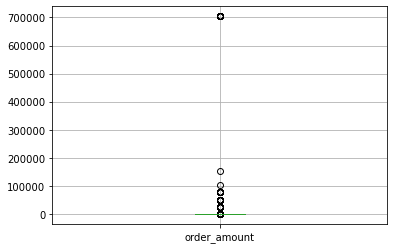

In [33]:
bp = sneakers_data.boxplot(column = 'order_amount') 

We can note from the very skewed image of the box plot, where the box itself is barely visible that the outlier datapoints that is heavily skewing the AOV. In order understand how to move forward, below I take a closer look at the datapoints above the 99th percentile.

In [45]:
quantile_99 = sneakers_data['order_amount'].quantile(0.99)
sneakers_data[sneakers_data['order_amount'] > quantile_99]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000000
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000000
490,491,78,936,51450,2,debit,2017-03-26 17:08:18.911213
493,494,78,983,51450,2,cash,2017-03-16 21:39:35.399765
511,512,78,967,51450,2,cash,2017-03-09 07:23:13.640290
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00.000000
617,618,78,760,51450,2,cash,2017-03-18 11:18:41.848103
691,692,78,878,154350,6,debit,2017-03-27 22:51:43.202894
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00.000000
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:19.843287


The above 44 records are datapoints above the 99th percentile, i.e. greater than the order amount value of 25725.0. Upon a brief glance of this data it can be confirms that some of these orders are fairly large. To summarize my observations:

* Shop 42 has a reccuring order of 2000 pair of sneakers that amounts to \$704000 that is orders at the same time by the same user at seemingly random days apart. This order amount is an outlier and is also rather peculiar and should be verified if possible. 

* Shop 78 sells particularly expensive sneakers, i.e. they cost \$25725 for a pair.

* These two shops, 42 and 78 alone account for orders above the 99th percentile. 

If we remove the orders above the 99th percentile, we get the histogram seen below.

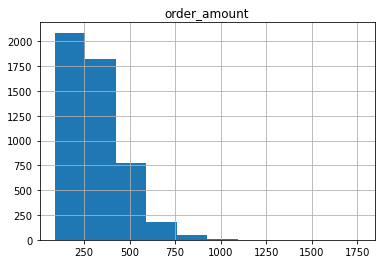

In [34]:
sneakers_data_filtered = sneakers_data[sneakers_data['order_amount'] < q]
histogram = sneakers_data_filtered.hist(column = 'order_amount') 

The histogram above shows a more reasonable estimated average. However, from the information provided on hand, I cannot eliminate the data above the 99th percentile to obtain a more reasonable AOV. Shop 42's expensive sneakers and 78's large orders are both still valid and cannot be eliminated from the dataset. Rather, we should consider that mean is not a very informative statistic for this dataset.

### What metric would you report for this dataset?

A more informative statistic for this dataset is median and other various quantiles. Below is the calculation for those statistics.

In [51]:
sneakers_data['order_amount'].describe().round(2)

count      5000.00
mean       3145.13
std       41282.54
min          90.00
25%         163.00
50%         284.00
75%         390.00
max      704000.00
Name: order_amount, dtype: float64

### What is its value?

The median order value is \$284. Additionally, 25\% of the orders are below \$163 and 25\% are above \$390. Refer to the table below for the percentile values. 

In [54]:
sneakers_data['order_amount'].quantile([.25, .5, .75, 0.99]).to_frame()

,order_amount
0.25,163.0
0.50,284.0
0.75,390.0
0.99,25725.0


# Question 2

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

Assumptions: Not all database systems support commands such asLIMIT. Thus, my queries are tested on the link provided in the description since I am assuming the database that will be tested upon is one that is similar to that provided in the link.

### How many orders were shipped by Speedy Express in total?

Query:

Result: Speedy Express has shipped 54 orders in total.

### What is the last name of the employee with the most orders?

Query:

Result: The last name of the employee with the most orders is Peacock. Mr. Peacock has 40 orders.

### What product was ordered the most by customers in Germany?

Query:

SELECT ProductName

FROM Customers as C, Orders as O, OrderDetails as OD, Products as P

WHERE C.Country = 'Germany' AND C.CustomerID = O.CustomerID AND O.OrderID = OD.OrderID AND OD.ProductID = P.ProductID

GROUP BY ProductName

HAVING SUM(Quantity)= (SELECT MAX(q)

                        FROM (SELECT P.ProductID, ProductName, SUM(Quantity) as q
                        
                              FROM Customers as C, Orders as O, OrderDetails as OD, Products as P
                              
                              WHERE C.Country = 'Germany' AND C.CustomerID = O.CustomerID AND O.OrderID = OD.OrderID AND OD.ProductID = P.ProductID
                              
                              GROUP BY P.ProductID, ProductName));

The product ordered the most by customers in Germany is Boston Crab Meat. It has 160 orders.